# Project Text Processing Data


In [1]:
import nltk
import pandas as pd
import numpy as np
import string
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
import re
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
# from term_frequency import term_frequencies, feature_names, df_term_frequencies

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
transformer = TfidfTransformer()
tt = TweetTokenizer()

In [2]:
df = pd.read_csv('Tweets.csv', sep=',')

# syntax features

syntax = pd.DataFrame(df)

# df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
# syntax_df['punctuation'] = syntax_df.apply(lambda x: '1' if 
# syntax_df['keyboard_smash'] = 
# syntax_df['user_mention'] = 
                                           
                                           
def find_punctuations(text):
    result = re.findall(r'[!"\$%&\'()+,\-.\/:;=#@?\[\\\]^_`{|}~]', text)
    string = "".join(result)
    return list(string)

def count_punctuations(text):
    result = re.findall(r'[!"\$%&\'()+,\-.\/:;=#@?\[\\\]^_`{|}~]', text)
    count = len(result)
    return count

def count_capitals(text):
    result = re.findall('[A-Z]', text)
    count = len(result)
    return count

def count_hashtags(text):
    result = re.findall('#', text)
    count = len(result)
    return count

def count_characters(text):
    result = len(text)
    return result

def find_digits(text):
    result = re.findall('[0-9]', text)
    return result

def count_digits(text):
    result = re.findall('[0-9]', text)
    count = len(result)
    return count

def find_smash(text):
    smash = re.findall(r"([a-z][A-Z])\1{2,}", text)
    if not smash: 
        return False
    else:
        return True
    
def find_mention(text):
    result = re.findall("@", text)
    count = len(result)
    return count

def find_url(text):
    result = re.findall("http", text)
    count = len(result)
    return count
    
syntax['punctuation_used'] = syntax['text'].apply( lambda x : find_punctuations(x))
syntax['number_punctuations'] = syntax['text'].apply( lambda x : count_punctuations(x))
syntax['number_capital_letters'] = syntax['text'].apply( lambda x : count_capitals(x))
syntax['number_hashtags'] = syntax['text'].apply( lambda x : count_hashtags(x))
syntax['number_characters'] = syntax['text'].apply( lambda x : count_characters(x))
syntax['digits'] = syntax['text'].apply( lambda x : find_digits(x))
syntax['count_digits'] = syntax['text'].apply( lambda x : count_digits(x))
syntax['keyboard_smash'] = syntax['text'].apply( lambda x : find_smash(x))
syntax['number_mentions'] = syntax['text'].apply( lambda x : find_mention(x))
syntax['number_urls'] = syntax['text'].apply( lambda x : find_url(x))


syntax.drop(['punctuation_used','digits'], inplace=True, axis=1)
syntax.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_location,user_timezone,number_punctuations,number_capital_letters,number_hashtags,number_characters,count_digits,keyboard_smash,number_mentions,number_urls
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,Eastern Time (US & Canada),3,3,0,35,0,False,2,0
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),6,2,0,72,0,False,1,0
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,Lets Play,Central Time (US & Canada),6,5,0,71,0,False,1,0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),7,2,0,126,0,False,1,0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),2,2,0,55,0,False,1,0
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,...,NaN,Pacific Time (US & Canada),5,4,0,135,2,False,1,0
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,...,San Francisco CA,Pacific Time (US & Canada),4,5,0,79,0,False,1,0
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,...,Los Angeles,Pacific Time (US & Canada),8,11,0,108,1,False,1,1
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,...,San Diego,Pacific Time (US & Canada),6,9,0,47,0,False,1,0
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,...,Los Angeles,Eastern Time (US & Canada),5,3,0,80,0,False,1,0


In [3]:
def preprocess_tweets(text):
    
# remove mentions and URLs
    text_noMentionURL = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)
    text_noMentionURL = " ".join(text_noMentionURL.split())
    
# remove '#' symbols and add space before capital letter
    text_noHash = re.sub(r"([A-Z]+)", r" \1", text_noMentionURL)
    text_noHash = re.sub(r"(#)", "", text_noHash)
    text_noHash = " ".join(text_noHash.split())
    
# remove numbers
    text_noHash = re.sub(r"[0-9]+", "", text_noHash)
    
# remove all other punctuation
    text_noNoise = "".join([char for char in text_noHash if char not in string.punctuation])

    return text_noNoise.lower()


df['tweet_noNoise'] = df["text"].apply(lambda x: preprocess_tweets(x))


def no_smash(text):
    
    no_smash = re.sub(r"(?:(?![aeiou])[a-z]){5}", r"", text)
    no_smash = " ".join(no_smash.split())
    
    return no_smash
    
df['tweet_noNoise'] = df["tweet_noNoise"].apply(lambda x: no_smash(x))

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,number_punctuations,number_capital_letters,number_hashtags,number_characters,digits,count_digits,keyboard_smash,number_mentions,number_urls,tweet_noNoise
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,3,3,0,35,[],0,False,2,0,what said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,6,2,0,72,[],0,False,1,0,plus youve added commercials to the experience...
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,6,5,0,71,[],0,False,1,0,i didnt today must mean i need to take another...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,7,2,0,126,[],0,False,1,0,its really aggressive to blast obnoxious enter...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,2,2,0,55,[],0,False,1,0,and its a really big bad thing about it


In [5]:
#pip install wordcloud

     |████████████████████████████████| 458 kB 5.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


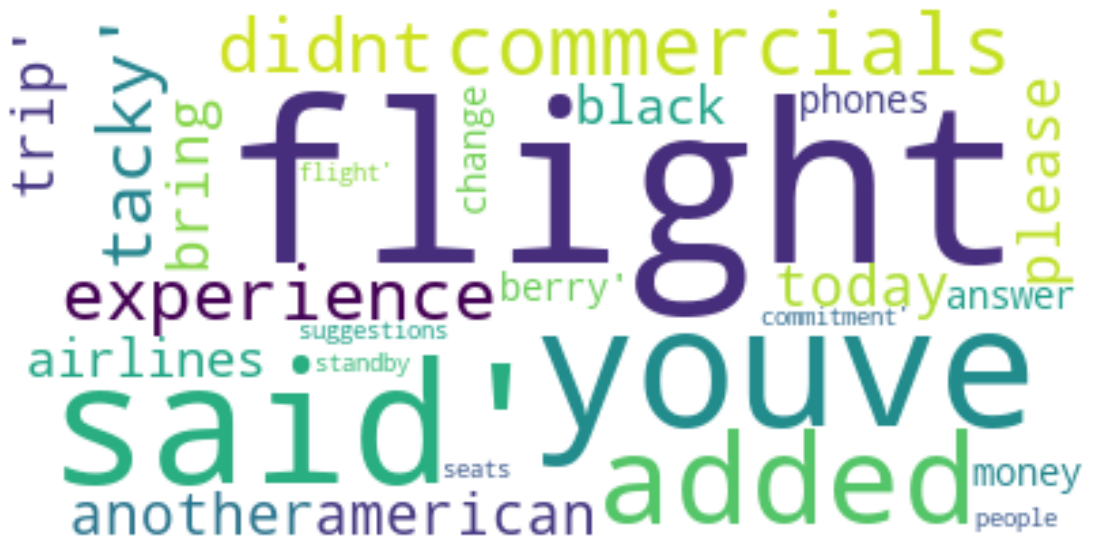

In [4]:
# word cloud
text = df["tweet_noNoise"].values 

wordcloud = WordCloud(background_color="white", max_words=100, min_word_length=5).generate(str(text))

plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(wordcloud,interpolation='bilInear')
plt.axis("off")
plt.show()